In [66]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [70]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [72]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(market_data_df)




In [74]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_data_df['coin_id'] = market_data_df.index

# Set the coinid column as index
scaled_data_df.set_index('coin_id', inplace=True)

# Display sample data
scaled_data_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [76]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(11)





/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


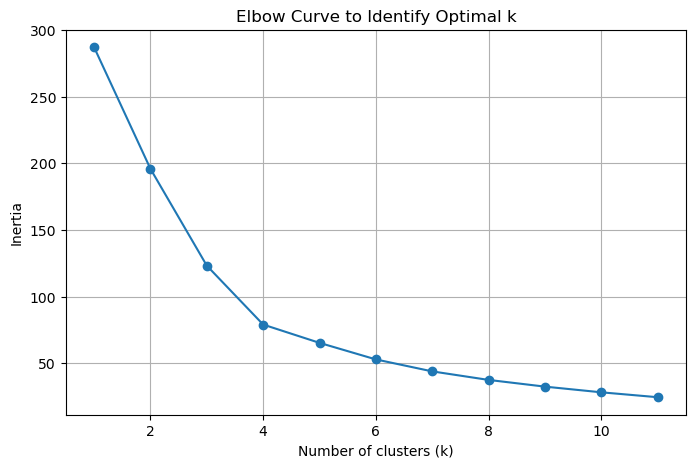

In [78]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve to Identify Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best kk will likely be the one just before the curve starts to level off. So at k = 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [136]:
# Initialize the K-Means model using the best value for k

best_k = 4  

# Initialize the KMeans model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=1)




In [138]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [140]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans.predict(scaled_data_df)

# View the resulting array of cluster values.
print(crypto_clusters)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [142]:
# Create a copy of the DataFrame
crypto_clustered_df = scaled_data_df.copy()

In [144]:
# Add a new column to the DataFrame with the predicted clusters
crypto_clustered_df['Cluster'] = crypto_clusters

# Display sample data
crypto_clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: title={'center': 'Cryptocurrency Clusters based on 24h and 7d Price Changes'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

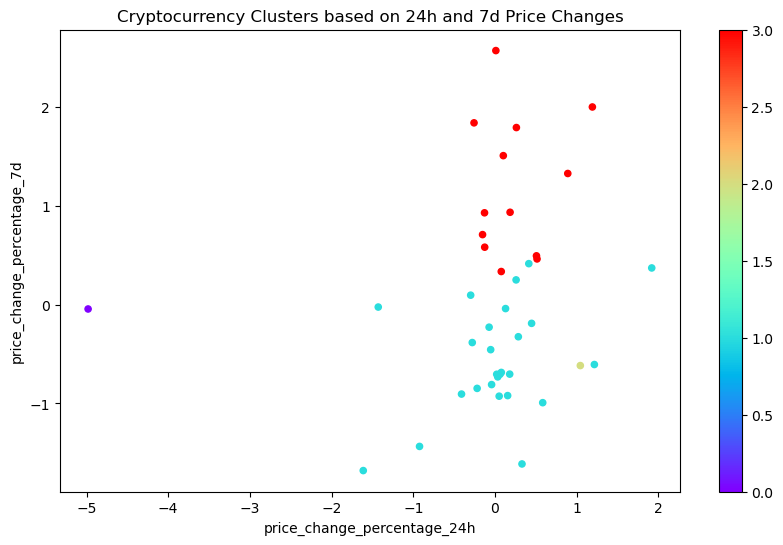

In [146]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

crypto_clustered_df.plot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c=crypto_clustered_df['Cluster'],  # Use the cluster values for coloring
    colormap="rainbow", 
    figsize=(10, 6),
    title="Cryptocurrency Clusters based on 24h and 7d Price Changes"
)


### Optimize Clusters with Principal Component Analysis.

In [148]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [150]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

pca_data = pca.fit_transform(scaled_data_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
# View the first five rows of the DataFrame. 
pca_df.head(5)

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [152]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.

explained_variance_ratio = pca.explained_variance_ratio_

total_explained_variance = explained_variance_ratio.sum()
print(f"Explained variance ratio for each principal component: {explained_variance_ratio}")
print(f"Total explained variance: {total_explained_variance}")


Explained variance ratio for each principal component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance: 0.8950316570309842

In [154]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = scaled_data_df.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head(11)


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [156]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA data
    kmeans.fit(pca_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca.head(11)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


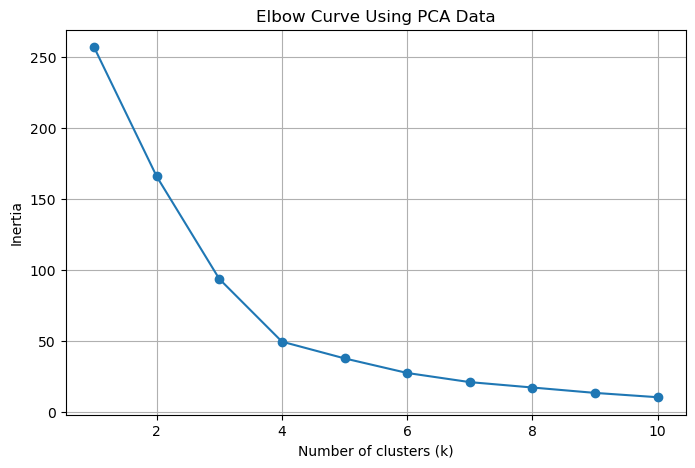

In [158]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.title('Elbow Curve Using PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` when using the PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** So its the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [160]:
# Initialize the K-Means model using the best value for k

best_k_pca = 4  


kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=1)



In [162]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [164]:
# Predict the clusters to group the cryptocurrencies using the PCA data

crypto_clusters_pca = kmeans_pca.predict(pca_df)
# Print the resulting array of cluster values.
print(crypto_clusters_pca)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [166]:
# Create a copy of the DataFrame with the PCA data

crypto_clustered_pca_df = pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters

crypto_clustered_pca_df['Cluster'] = crypto_clusters_pca
# Display sample data
crypto_clustered_pca_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [168]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas


scatter_plot = crypto_clustered_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap="rainbow",
    title="Cryptocurrency Clusters Based on PCA Components"
)

scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [170]:
# Use the columns from the original scaled DataFrame as the index.

pca_components = pca.components_

pca_components_df = pd.DataFrame(pca_components, columns=scaled_data_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the DataFrame with PCA components
print(pca_components_df)




     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  
Top features influencing PC1:
price_change_percentage_200d    0.594468
price_chan

In [172]:
# To determine which features have the strongest positive or negative influence on each component:
# the absolute values of the coefficients
feature_influence = pca_components_df.abs()

# the features with the highest influence on each principal component
for component in pca_components_df.index:
    print(f"Top features influencing {component}:")
    top_features = feature_influence.loc[component].nlargest(10)
    print(top_features)

Top features influencing PC1:
price_change_percentage_200d    0.594468
price_change_percentage_1y      0.568379
price_change_percentage_24h     0.416728
price_change_percentage_60d     0.320365
price_change_percentage_30d     0.191523
price_change_percentage_7d      0.102432
price_change_percentage_14d     0.009162
Name: PC1, dtype: float64
Top features influencing PC2:
price_change_percentage_30d     0.562182
price_change_percentage_14d     0.540415
price_change_percentage_60d     0.434040
price_change_percentage_24h     0.358162
price_change_percentage_7d      0.227432
price_change_percentage_1y      0.150789
price_change_percentage_200d    0.027735
Name: PC2, dtype: float64
Top features influencing PC3:
price_change_percentage_7d      0.787670
price_change_percentage_60d     0.361377
price_change_percentage_14d     0.349534
price_change_percentage_24h     0.218795
price_change_percentage_1y      0.210541
price_change_percentage_30d     0.181744
price_change_percentage_200d    0.0397

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**

**PC1 (Principal Component 1):**

* Strongest Positive Influences:
price_change_percentage_200d (0.594468)
price_change_percentage_1y (0.568379)
price_change_percentage_24h (0.416728)
* Negative Influences:
All the features listed have positive influences on PC1. There are no strong negative influences shown in the provided results.

**PC2 (Principal Component 2):**

* Strongest Positive Influences:
price_change_percentage_30d (0.562182)
price_change_percentage_14d (0.540415)
price_change_percentage_60d (0.434040)
* Negative Influences:
The influence of price_change_percentage_200d is the smallest (0.027735), indicating it has a relatively weak positive influence compared to the others.

**PC3 (Principal Component 3):**

* Strongest Positive Influences:
price_change_percentage_7d (0.787670)
price_change_percentage_60d (0.361377)
price_change_percentage_14d (0.349534)
* Negative Influences:
Similar to PC1, all the features listed have positive influences on PC3. There are no strong negative influences shown in the provided results.


**Summary**
* PC1: The features price_change_percentage_200d, price_change_percentage_1y, and price_change_percentage_24h have the strongest positive influence. No strong negative influences are present.
* PC2: The features price_change_percentage_30d, price_change_percentage_14d, and price_change_percentage_60d have the strongest positive influence. price_change_percentage_200d has the least influence among the features listed.
* PC3: The features price_change_percentage_7d, price_change_percentage_60d, and price_change_percentage_14d have the strongest positive influence. No strong negative influences are present.

    